In [29]:
import pandas as pd
import requests
from io import StringIO
import re
import datetime


In [57]:
pd.set_option('display.max_rows', 1000)


In [2]:
violations = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

C:\Users\zylst\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#Set API url
url = 'https://data.nashville.gov/resource/7qhx-rexh.csv'

#create request object
r = requests.get(url)

#convert to csv
covid_violations = pd.read_csv(StringIO(r.text))

covid_violations.info()

In [3]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479306 entries, 0 to 479305
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Request #                   479306 non-null  int64  
 1   Status                      479306 non-null  object 
 2   Request Type                478975 non-null  object 
 3   Subrequest Type             475816 non-null  object 
 4   Additional Subrequest Type  475665 non-null  object 
 5   Date / Time Opened          479306 non-null  object 
 6   Date / Time Closed          467913 non-null  object 
 7   Request Origin              479306 non-null  object 
 8   System of Origin ID         29204 non-null   object 
 9   Contact Type                27446 non-null   object 
 10  Preferred Language          0 non-null       float64
 11  State Issue                 479306 non-null  bool   
 12  Parent Request              5122 non-null    float64
 13  Closed When Cr

In [4]:
violations['Request Type'].unique()

array(['Trash, Recycling & Litter', 'Property Violations',
       'Streets, Roads & Sidewalks', 'Other', 'Transit',
       'Resolved by hubNashville on First Call',
       'Electric & Water General', 'Public Safety', 'Permits',
       'Police Chief Search', 'Parks', 'Planning & Zoning',
       'Social Services & Housing', 'COVID-19', 'Hands On Volunteers',
       'Storm Relief', 'Public Records Request', 'Quick Requests',
       'Workforce & Jobs', 'Education & Libraries',
       'Admin Support Request', nan, 'WIRES',
       'Submit Budget Ideas to Mayor Briley',
       'Consumer Protection Request', 'BRUSH'], dtype=object)

In [5]:
covid_only = violations[violations['Request Type']== 'COVID-19']
covid_only['Subrequest Type'].unique()

array(['COVID-19 Violations', 'COVID-19 Questions',
       'COVID-19 Guidance for Reopening Businesses',
       'COVID-19 - Submit Input about The Plan to Reopen Nashville', nan],
      dtype=object)

In [6]:
covid_only = covid_only[covid_only['Subrequest Type']== 'COVID-19 Violations']

In [7]:
covid_only['Address'].value_counts()

210 Anne Dallas Dudley Blvd    287
21B Fern Ave                   117
5106 Old Hickory Blvd           51
333 Commerce St                 51
221 Broadway                    47
                              ... 
116 21st Ave N                   1
149 Barker Rd                    1
320 Long Hollow Pike             1
900 Heritage Way                 1
1116 Dickerson Pike              1
Name: Address, Length: 4829, dtype: int64

In [8]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11632 entries, 1547 to 479249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Request #                   11632 non-null  int64  
 1   Status                      11632 non-null  object 
 2   Request Type                11632 non-null  object 
 3   Subrequest Type             11632 non-null  object 
 4   Additional Subrequest Type  11623 non-null  object 
 5   Date / Time Opened          11632 non-null  object 
 6   Date / Time Closed          11611 non-null  object 
 7   Request Origin              11632 non-null  object 
 8   System of Origin ID         0 non-null      object 
 9   Contact Type                46 non-null     object 
 10  Preferred Language          0 non-null      float64
 11  State Issue                 11632 non-null  bool   
 12  Parent Request              1 non-null      float64
 13  Closed When Created        

In [9]:
covid_only['Address'].value_counts()

210 Anne Dallas Dudley Blvd    287
21B Fern Ave                   117
5106 Old Hickory Blvd           51
333 Commerce St                 51
221 Broadway                    47
                              ... 
116 21st Ave N                   1
149 Barker Rd                    1
320 Long Hollow Pike             1
900 Heritage Way                 1
1116 Dickerson Pike              1
Name: Address, Length: 4829, dtype: int64

In [10]:
covid_only = covid_only.drop(columns=['System of Origin ID','Contact Type','Preferred Language','Parent Request']).reset_index()

In [11]:
covid_only.shape

(11632, 18)

In [12]:
covid_only['City'].value_counts()

NASHVILLE         8627
MADISON            582
ANTIOCH            470
HERMITAGE          431
GOODLETTSVILLE     207
OLD HICKORY        200
BRENTWOOD           50
JOELTON             43
WHITES CREEK        27
LAVERGNE             9
NOLENSVILLE          5
Nashville            1
LA VERGNE            1
Name: City, dtype: int64

In [13]:
covid_only[covid_only['City'] == 'Nashville']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
13,22299,361889,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 06:57:32 PM,05/08/2020 05:08:50 PM,Phone,False,False,1297 Antioch Pike,Nashville,NaN,37211,NaN,NaN,NaN


In [14]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       11632 non-null  int64  
 1   Request #                   11632 non-null  int64  
 2   Status                      11632 non-null  object 
 3   Request Type                11632 non-null  object 
 4   Subrequest Type             11632 non-null  object 
 5   Additional Subrequest Type  11623 non-null  object 
 6   Date / Time Opened          11632 non-null  object 
 7   Date / Time Closed          11611 non-null  object 
 8   Request Origin              11632 non-null  object 
 9   State Issue                 11632 non-null  bool   
 10  Closed When Created         11632 non-null  bool   
 11  Address                     11258 non-null  object 
 12  City                        10653 non-null  object 
 13  Council District            106

In [15]:
covid_only.iloc[13,12] = covid_only.iloc[13,12].upper()

In [16]:
covid_only['City'].value_counts()

NASHVILLE         8628
MADISON            582
ANTIOCH            470
HERMITAGE          431
GOODLETTSVILLE     207
OLD HICKORY        200
BRENTWOOD           50
JOELTON             43
WHITES CREEK        27
LAVERGNE             9
NOLENSVILLE          5
LA VERGNE            1
Name: City, dtype: int64

In [17]:
covid_only[covid_only['City']=='LA VERGNE']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
9518,401452,442297,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/11/2020 02:50:02 PM,08/12/2020 03:47:37 PM,Phone,False,False,Firestone Pkwy & Old Hickory Blvd,LA VERGNE,33.0,37086,36.01689,-86.61985,"(36.01689, -86.61985)"


In [18]:
covid_only.iloc[9518,12] = 'LAVERGNE'

In [19]:
covid_only['ZIP'].value_counts()

37203.0    814
37211.0    643
37209.0    519
37207.0    485
37115.0    456
          ... 
37129.0      1
37130.0      1
38401.0      1
38506.0      1
37040.0      1
Name: ZIP, Length: 85, dtype: int64

In [21]:
covid_only['ZIP'] = covid_only['ZIP'].fillna(0).apply(str)

In [22]:
covid_only['ZIP'].unique()

array(['37013.0', '37214.0', '37204.0', '37218.0', '37203.0', '37206.0',
       '37207.0', '37209.0', '37211.0', '37115.0', '0', '37216.0',
       '37076.0', '37212.0', '37210.0', '37219.0', '37205.0', '37201.0',
       '37072.0', '37215.0', '37220.0', '37221.0', '37217.0', '37027.0',
       '37232.0', '37080.0', '37208.0', '37138.0', '37228.0', '37240.0',
       '37064.0', '37130.0', '37075.0', '37086.0', '38506.0', '37122.0',
       '37160.0', '37073.0', '37246.0', '37129.0', '37067.0', '37363.0',
       '37172.0', '38401.0', '37189.0', '37213.0', '37090.0', '37663.0',
       '37087.0', '37040.0', '37066.0', '37036.0', '37135.0', '37201',
       '37203', '37209', '37027', '37214', '37207', '37221', '37080',
       '37211', '37219', '37206', '37138', '37076', '37115', '37204',
       '37217', '37218', '37213', '37215', '37208', '37212', '37216',
       '37205', '37013', '37228', '37210', '37072', '37086', '37232',
       '37220', '37189', '37135', '37240'], dtype=object)

In [23]:
covid_only['ZIP'] = covid_only['ZIP'].str.replace('(\.\d)','')

In [24]:
covid_only[covid_only['ZIP']=='0']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
16,23181,362249,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 10:31:04 PM,05/11/2020 02:57:54 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
31,35402,426840,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:26:28 AM,07/30/2020 03:35:55 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
67,46641,426586,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/25/2020 04:25:26 PM,07/27/2020 04:59:17 PM,hubNashville Community,False,False,625 Sgt. Paul Huff Parkway Northwest,NaN,NaN,0,35.210383,-84.859861,"(35.21038347906778, -84.85986115231826)"
124,83511,440804,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 12:19:06 PM,08/10/2020 04:22:25 PM,hubNashville Community,False,False,7630 Hwy 70 S,NaN,NaN,0,36.080078,-86.949125,"(36.08007791157165, -86.9491254932541)"
125,83553,440857,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 04:19:52 PM,08/10/2020 03:01:55 PM,hubNashville Community,False,False,7115 Bakers Bridge Ave,NaN,NaN,0,35.962645,-86.818637,"(35.96264471152191, -86.81863690674592)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,476572,491272,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/29/2020 05:01:43 PM,10/30/2020 02:00:14 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
11549,476592,491109,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/29/2020 03:29:07 PM,10/30/2020 02:00:27 PM,hubNashville Community,False,False,3381 Southall Rd,NaN,NaN,0,35.896428,-86.978482,"(35.89642800000001, -86.97848189999999)"
11550,476613,491592,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/29/2020 08:43:16 PM,10/30/2020 01:59:23 PM,hubNashville Community,False,False,845 Springfield Hwy,NaN,NaN,0,36.344605,-86.719257,"(36.3446046, -86.71925739999999)"
11557,477232,487802,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/24/2020 07:30:43 PM,10/26/2020 02:01:07 PM,hubNashville Community,False,False,6000 Hwy 41a,NaN,NaN,0,36.369854,-86.984785,"(36.36985411169506, -86.98478530000001)"


In [27]:
covid_only[covid_only['Address'].isna()]

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
16,23181,362249,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 10:31:04 PM,05/11/2020 02:57:54 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
31,35402,426840,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:26:28 AM,07/30/2020 03:35:55 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
39,37075,426843,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:33:28 AM,07/27/2020 08:15:16 PM,hubNashville Community,False,False,NaN,NASHVILLE,19.0,37203,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)"
111,81601,440879,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 05:44:18 PM,08/10/2020 03:42:04 PM,hubNashville Community,False,False,NaN,NASHVILLE,26.0,37211,36.088985,-86.741833,"(36.08898508095092, -86.74183345642209)"
159,91716,427043,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 05:48:15 PM,07/27/2020 05:01:15 PM,hubNashville Community,False,False,NaN,NASHVILLE,19.0,37201,36.161483,-86.775970,"(36.161483199590116, -86.77596987010585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11219,467467,482914,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/17/2020 11:52:02 PM,10/19/2020 04:02:23 PM,hubNashville Community,False,False,NaN,MADISON,10.0,37115,36.279907,-86.708587,"(36.27990691165665, -86.70858740000001)"
11375,471157,479046,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/10/2020 09:23:12 PM,10/12/2020 02:23:18 PM,hubNashville Community,False,False,NaN,HERMITAGE,11.0,37076,36.214730,-86.598598,"(36.2147301, -86.5985985)"
11419,472244,483034,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/18/2020 07:16:49 PM,10/19/2020 04:06:26 PM,hubNashville Community,False,False,NaN,NASHVILLE,3.0,37207,36.269265,-86.756126,"(36.2692651, -86.7561257)"
11548,476572,491272,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,10/29/2020 05:01:43 PM,10/30/2020 02:00:14 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN


In [33]:
covid_only["Date / Time Closed"] = covid_only["Date / Time Closed"].astype("datetime64")

covid_only["Date / Time Opened"] = covid_only["Date / Time Opened"].astype("datetime64")

In [35]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       11632 non-null  int64         
 1   Request #                   11632 non-null  int64         
 2   Status                      11632 non-null  object        
 3   Request Type                11632 non-null  object        
 4   Subrequest Type             11632 non-null  object        
 5   Additional Subrequest Type  11623 non-null  object        
 6   Date / Time Opened          11632 non-null  datetime64[ns]
 7   Date / Time Closed          11611 non-null  datetime64[ns]
 8   Request Origin              11632 non-null  object        
 9   State Issue                 11632 non-null  bool          
 10  Closed When Created         11632 non-null  bool          
 11  Address                     11258 non-null  object    

In [42]:
covid_only['Date / Time Opened'].dt.time

0        02:38:00
1        11:48:40
2        00:35:20
3        18:50:31
4        18:03:09
           ...   
11627    00:17:13
11628    20:50:02
11629    15:32:36
11630    21:47:56
11631    03:50:56
Name: Date / Time Opened, Length: 11632, dtype: object

In [46]:
covid_only['Month'] = covid_only['Date / Time Opened'].dt.month
covid_only['Day']=covid_only['Date / Time Opened'].dt.day

In [53]:
covid_only['Month/Day'] = covid_only['Month'].apply(str) + '/' + covid_only['Day'].apply(str)

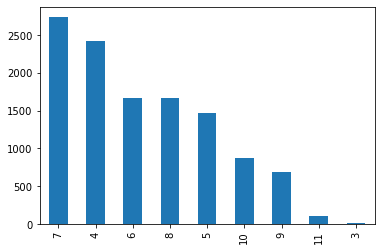

In [59]:
covid_only['Month'].value_counts().plot(kind='bar')

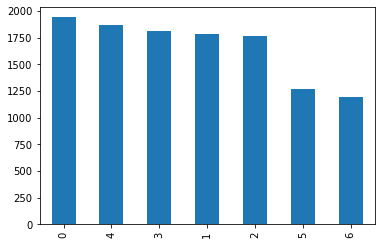

In [69]:
covid_only['Date / Time Opened'].dt.weekday.value_counts().plot(kind='bar') 
#monday is zero, sunday is 6, can rename for clarity's sake later

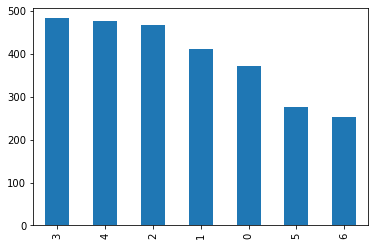

In [90]:
covid_only[covid_only['Month']==7]['Date / Time Opened'].dt.weekday.value_counts().plot(kind='bar'); 
#MAEVA to look at making a widget allowing you to select a month
#this shows which days had the most reported violations by day(0 is Monday, 6 is Sunday)

In [89]:
#MAEVA time series graph showing violations reported as time goes on from 0:00 to 23:59 and/or doing date+time timeline graph